In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df0 = pd.read_csv('Caborca.TXT', skiprows=4, sep='\s+')

In [9]:
df0.head()

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,23/01/2019,17:00,262.0,265.0,11.94,32.8,16.2,35.0,1003.1,0.0,511.5
1,23/01/2019,18:00,241.0,249.0,9.53,36.2,19.4,29.0,1002.7,0.0,624.7
2,23/01/2019,19:00,247.0,263.0,30.46,64.7,20.9,23.0,1001.7,0.0,705.2
3,23/01/2019,20:00,236.0,249.0,31.26,62.9,21.8,21.0,1000.1,0.0,678.7
4,23/01/2019,21:00,231.0,253.0,30.95,58.2,22.3,20.0,998.7,0.0,577.3


In [10]:
df = pd.DataFrame(df0)

In [11]:
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [12]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [13]:
df.head()


,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,262.0,265.0,11.94,32.8,16.2,35.0,1003.1,0.0,511.5,2019-01-23 17:00:00
1,241.0,249.0,9.53,36.2,19.4,29.0,1002.7,0.0,624.7,2019-01-23 18:00:00
2,247.0,263.0,30.46,64.7,20.9,23.0,1001.7,0.0,705.2,2019-01-23 19:00:00
3,236.0,249.0,31.26,62.9,21.8,21.0,1000.1,0.0,678.7,2019-01-23 20:00:00
4,231.0,253.0,30.95,58.2,22.3,20.0,998.7,0.0,577.3,2019-01-23 21:00:00


In [14]:
df.describe()


,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,140.000000,139.000000,139.000000,139.000000,139.00000,139.000000,139.000000,139.000000,137.000000
mean,188.507143,201.812950,15.012878,32.497842,14.60000,50.002878,986.579137,2.190647,165.360584
std,76.655869,74.946509,8.224910,15.063708,6.29633,81.466778,84.344737,25.827353,247.321154
min,0.000000,26.000000,0.770000,11.500000,3.70000,19.000000,0.000000,0.000000,0.000000
25%,152.500000,184.500000,9.100000,20.750000,9.20000,32.000000,991.550000,0.000000,0.000000
50%,196.000000,207.000000,13.750000,28.300000,13.90000,44.000000,993.400000,0.000000,0.000000
75%,239.500000,257.000000,20.000000,40.200000,20.25000,54.500000,995.850000,0.000000,321.700000
max,358.000000,354.000000,41.780000,70.300000,26.20000,989.400000,1003.100000,304.500000,731.300000


In [15]:
df_tmp = df[df.TEMP > 24]
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
52,195.0,203.0,21.83,49.6,24.3,24.0,993.5,0.0,588.3,2019-01-25 21:00:00
53,196.0,200.0,30.29,60.3,24.3,26.0,992.8,0.0,490.7,2019-01-25 22:00:00
99,195.0,211.0,13.96,35.3,24.9,22.0,994.9,0.0,686.8,2019-01-27 20:00:00
124,194.0,202.0,24.22,52.0,24.8,25.0,991.0,0.0,601.0,2019-01-28 21:00:00
125,202.0,199.0,24.24,54.9,24.6,26.0,990.8,0.0,321.7,2019-01-28 22:00:00
147,101.0,130.0,12.20,31.1,24.1,32.0,989.7,0.0,731.3,2019-01-29 20:00:00
150,188.0,196.0,23.97,43.9,24.4,33.0,988.0,0.0,127.3,2019-01-29 23:00:00


In [16]:
df.mean()

DIRS      188.507143
DIRR      201.812950
VELS       15.012878
VELR       32.497842
TEMP       14.600000
HR         50.002878
PB        986.579137
PREC        2.190647
RADSOL    165.360584
dtype: float64

In [17]:
df.TEMP.mean()


14.6

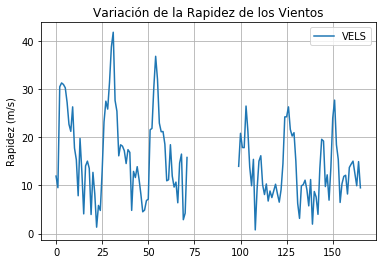

In [18]:
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

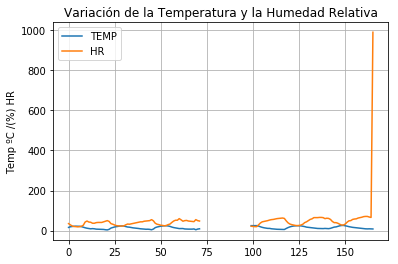

In [19]:
df1 = df[['TEMP','HR']]
plt.figure();df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

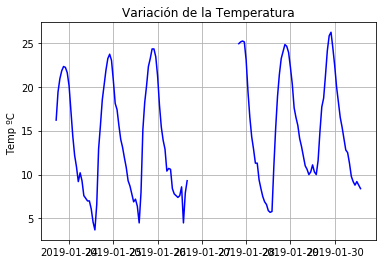

In [20]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC ")
plt.grid(True)
plt.show()


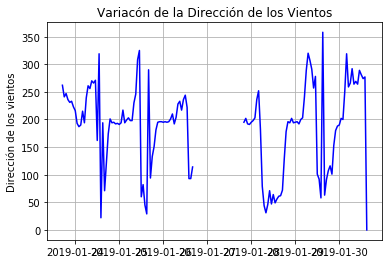

In [21]:
#Variacónde de la dirección de los vientos

plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="b-")
plt.title("Variacón de la Dirección de los Vientos")
plt.ylabel("Dirección de los vientos")
plt.grid(True)
plt.show()

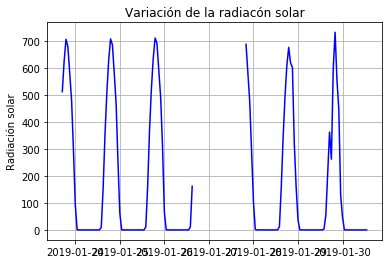

In [22]:
#Variacionde la radicación solar
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Variación de la radiacón solar")
plt.ylabel("Radiación solar")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

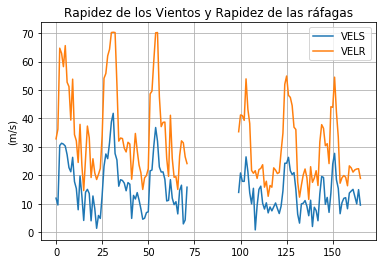

In [25]:
# Gráfica de Rapidez de los vientos y Rapidez de las ráfagas vs Tiempo
df1 = df[['VELS','VELR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Rapidez de los Vientos y Rapidez de las ráfagas")
plt.ylabel("(m/s)")
plt.grid(True)
plt.show()

In [42]:
#Lapso de temperatura diaria 
max(df.TEMP)-min(df.TEMP)

22.5